# Aykırı Gözlem Analizi

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

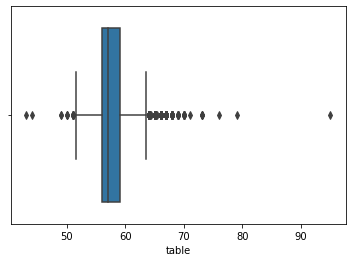

In [4]:
sns.boxplot(x = df_table);

In [5]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [6]:
Q1 = df_table.quantile(0.05)

In [7]:
Q1

54.0

In [8]:
Q3 = df_table.quantile(0.95)

In [9]:
IQR = Q3-Q1

In [10]:
lower = Q1 - 1.5*IQR

In [11]:
lower

43.5

In [12]:
upper = Q3 + 1.5*IQR

In [13]:
upper

71.5

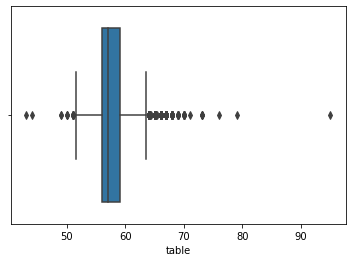

In [14]:
sns.boxplot(x = df_table);

In [15]:
df_table[(df_table > upper) | (df_table < lower)]

11368    43.0
24932    95.0
49375    73.0
50773    79.0
51342    76.0
51391    73.0
52860    73.0
52861    73.0
Name: table, dtype: float64

In [16]:
#silme

In [17]:
temiz_d = df_table[~((df_table > upper) | (df_table < lower))]

In [18]:
df.shape

(53940, 7)

In [19]:
temiz_d.shape

(53932,)

In [20]:
#ortalama(onerilmez)

In [21]:
outliers_tf = (df_table > upper) | (df_table < lower)

In [22]:
outliers_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [23]:
df_table[outliers_tf] = df_table.mean()

C:\Users\gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_table.mean()

57.454860168173305

In [25]:
df_table[outliers_tf]

11368    57.457184
24932    57.457184
49375    57.457184
50773    57.457184
51342    57.457184
51391    57.457184
52860    57.457184
52861    57.457184
Name: table, dtype: float64

In [26]:
#baskılama

In [27]:
df_table[outliers_tf] = upper

C:\Users\gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
#atama

In [29]:
df_table[(df_table < lower)]

Series([], Name: table, dtype: float64)

In [30]:
df_table[(df_table < lower)] = lower

C:\Users\gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_table[(df_table > upper)]

Series([], Name: table, dtype: float64)

In [32]:
df_table[(df_table > upper)] = upper

C:\Users\gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_table[outliers_tf]

Series([], Name: table, dtype: float64)

# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. 

Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. 

Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [57]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [58]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [59]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [60]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [61]:
df_scores = clf.negative_outlier_factor_

In [63]:
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [74]:
np.sort(df_scores)[0:50]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736,
       -3.16270895, -3.0900127 , -3.08096113, -3.07879797, -3.06943824,
       -3.0581048 , -3.03756565, -3.02610611, -2.96150262, -2.92133335,
       -2.8910913 , -2.87177688, -2.86404215, -2.85995025, -2.80025433,
       -2.7948162 , -2.79239569, -2.78583061, -2.77804997, -2.76102085])

In [78]:
esik_deger = np.sort(df_scores)[3]

In [79]:
esik_deger

-4.984151747711709

In [80]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [91]:
df.describe([0.75, 0.90, 0.99]).T

,count,mean,std,min,50%,75%,90%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.70,1.04,1.51,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,61.80,62.50,63.30,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,57.00,59.00,60.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,2401.00,5324.25,9821.00,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,5.70,6.54,7.31,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,5.71,6.54,7.30,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,3.53,4.04,4.52,5.15,31.80


In [88]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


# Eksik Veri Analizi

In [92]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [93]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [94]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [95]:
df.isnull().sum().sum()

7

In [96]:
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [97]:
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
#silme

In [98]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
#basit deger atama yonteme

In [99]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [100]:
df["V1"].mean()

6.0

In [101]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [102]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [103]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [107]:
df["V3"].fillna(df["V3"].mean())

0    11.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6    11.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [108]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# Eksik Verinin Görselleştirilmesi ve Rassallığının İncelenmesi

In [ ]:
#!pip install missingno

In [110]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [111]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [109]:
import missingno as msno

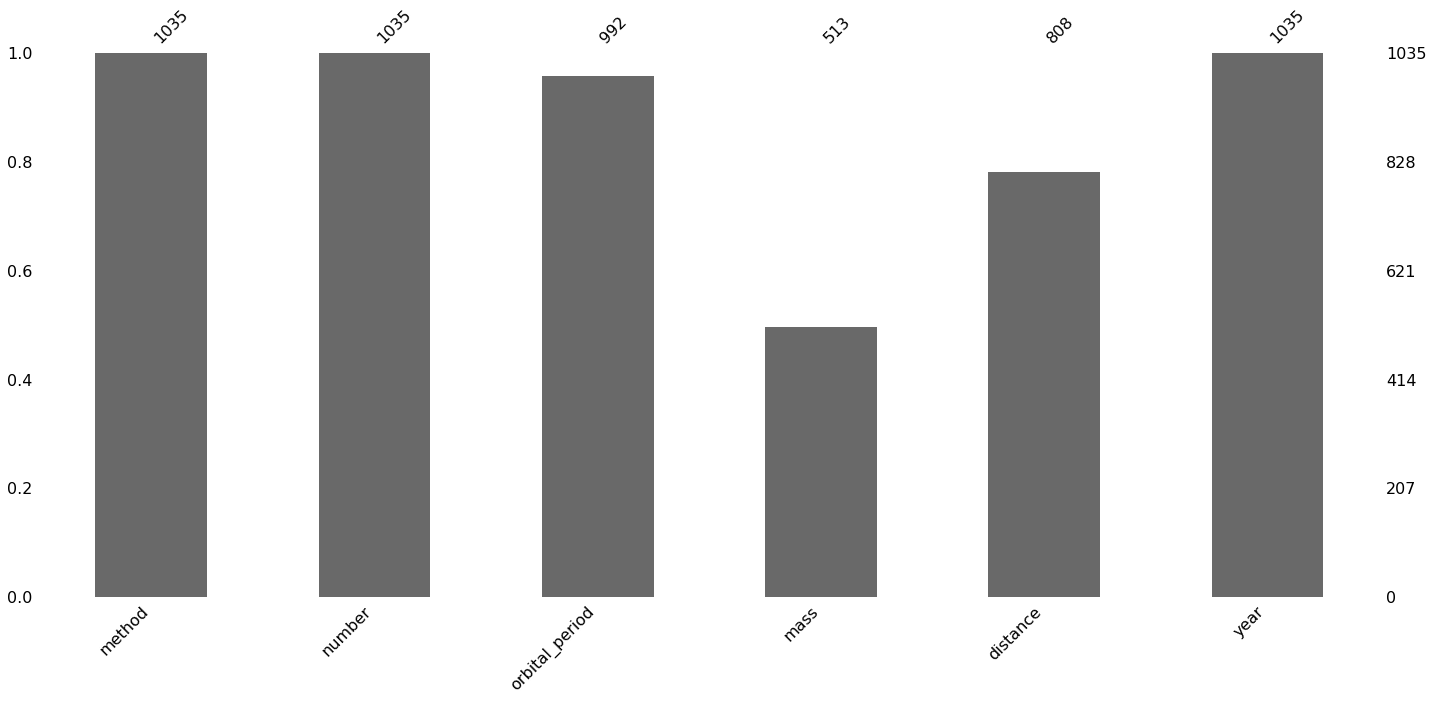

In [112]:
msno.bar(df);

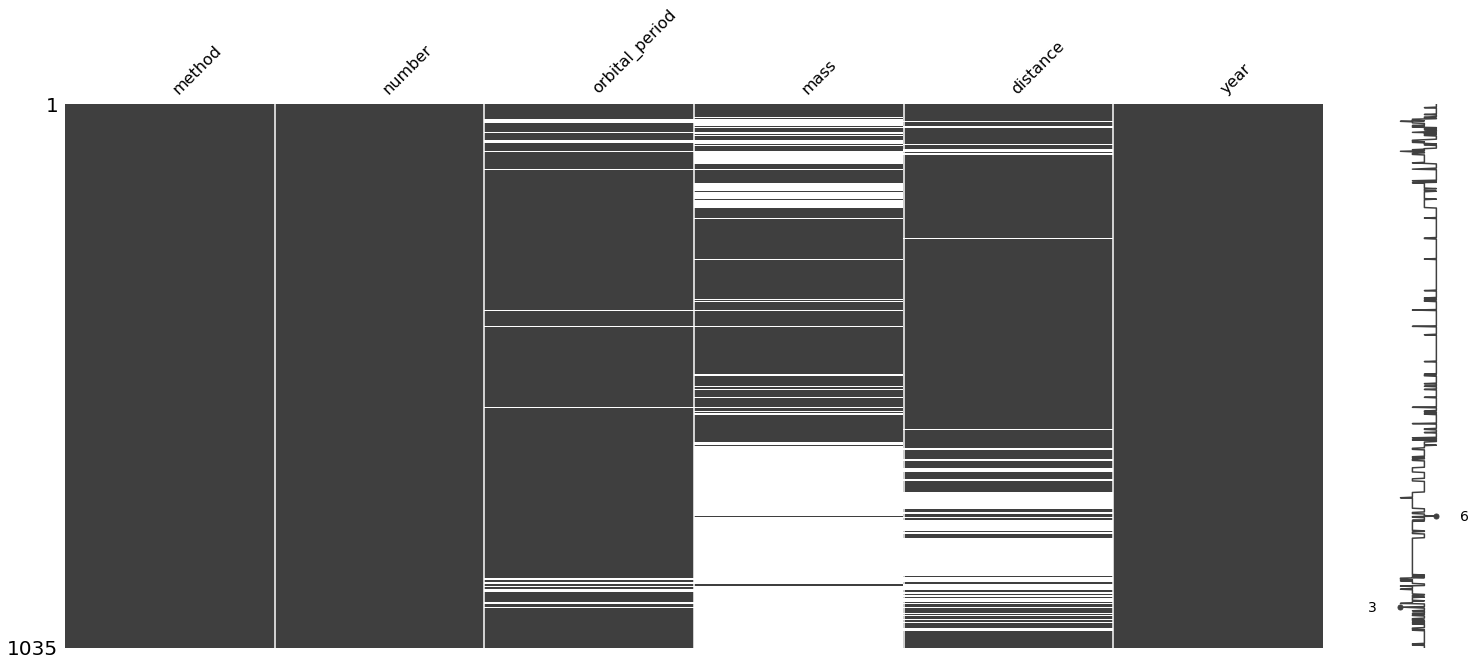

In [113]:
msno.matrix(df);

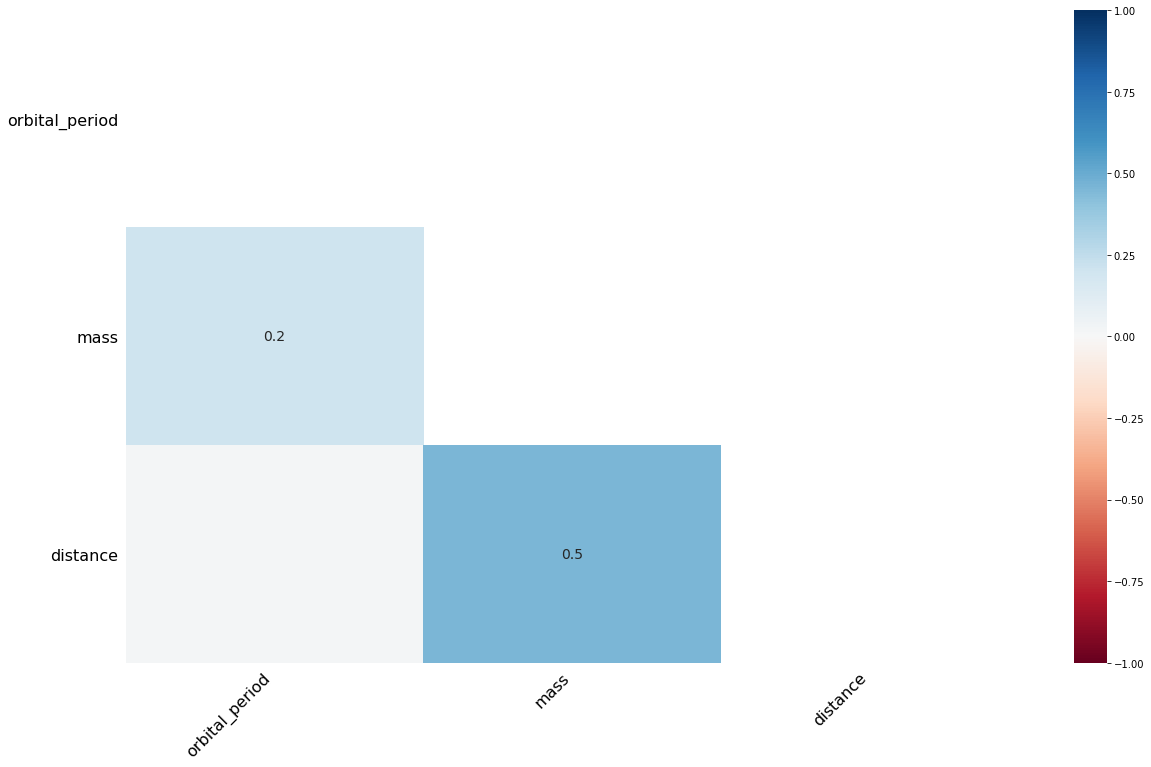

In [114]:
msno.heatmap(df);

In [115]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [118]:
# Kategorik Değişken Özelinde Değer Atama

In [117]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [119]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [120]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [128]:
df.loc[(df["maas"].isnull()) & (df["departman"] == "IK"), "maas"] = 4.666667

In [129]:
df

,maas,V2,V3,departman
0,1.000000,7.0,NaN,IT
1,3.000000,NaN,12.0,IT
2,6.000000,5.0,5.0,IK
3,4.666667,8.0,6.0,IK
4,7.000000,12.0,14.0,IK
5,1.000000,NaN,7.0,IK
6,4.666667,NaN,NaN,IK
7,9.000000,2.0,2.0,IT
8,15.000000,3.0,31.0,IT


# Kategorik Degiskenlerde Deger Atama

In [130]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [131]:
df["departman"].mode()[0]

'IK'

In [132]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [133]:
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [134]:
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [135]:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Değişken Standardizasyonu & Dönüşümleri

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [ ]:
#ortalaması 0 standart sapması 1 

In [2]:
from sklearn import preprocessing

In [3]:
?preprocessing.scale

Signature: preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix}
    The data to center and scale.

axis : int (0 by default)
    axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : boolean, True by default
    If True, center the data before scaling.

with_std : boolean, True by default
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : boolean, optional, default True
    set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSC matrix and if axis is 1).

Notes
-----
This implementation will refuse to 

In [4]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [5]:
#normalize

In [7]:
?preprocessing.normalize

Signature: preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
Docstring:
Scale input vectors individually to unit norm (vector length).

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
X : {array-like, sparse matrix}, shape [n_samples, n_features]
    The data to normalize, element by element.
    scipy.sparse matrices should be in CSR format to avoid an
    un-necessary copy.

norm : 'l1', 'l2', or 'max', optional ('l2' by default)
    The norm to use to normalize each non zero sample (or each non-zero
    feature if axis is 0).

axis : 0 or 1, optional (1 by default)
    axis used to normalize the data along. If 1, independently normalize
    each sample, otherwise (if 0) normalize each feature.

copy : boolean, optional, default True
    set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSR matrix and if axis is 1).

return_norm : boolea

In [6]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [11]:
#minmax
scaler = preprocessing.MinMaxScaler((0,1))

In [13]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [12]:
scaler.fit_transform(df)

array([[0.        , 0.28571429, 0.11111111],
       [0.33333333, 0.28571429, 0.77777778],
       [0.83333333, 0.        , 0.        ],
       [0.66666667, 0.42857143, 0.11111111],
       [1.        , 1.        , 1.        ]])

# Dönüşüm İşlemleri

In [14]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Label Encoding (0-1 Dönüşümü)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [21]:
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'classes_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [25]:
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

In [27]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [26]:
le.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [ ]:
#eksikdeger
#aykirideger
#labelencoding
#onehotencoding

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
?pd.get_dummies

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the co

In [36]:
pd.get_dummies(df, columns = ["day"], drop_first = True, dummy_na = True)

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_nan
0,16.99,1.01,Female,No,Dinner,2,0,0,1,0
1,10.34,1.66,Male,No,Dinner,3,0,0,1,0
2,21.01,3.50,Male,No,Dinner,3,0,0,1,0
3,23.68,3.31,Male,No,Dinner,2,0,0,1,0
4,24.59,3.61,Female,No,Dinner,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,1,0,0
240,27.18,2.00,Female,Yes,Dinner,2,0,1,0,0
241,22.67,2.00,Male,Yes,Dinner,2,0,1,0,0
242,17.82,1.75,Male,No,Dinner,2,0,1,0,0
